<a href="https://colab.research.google.com/github/linhvuueh/-17-3---31241023210----VU-PHUONG-LINH/blob/main/LICENSE_PLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir='/content/drive/MyDrive/NĂM NHẤT/AI/CNN/LICENSE PLATE'
img_width,img_height=128,128
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1.0/225,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
epochs=26
history=model.fit(train_generator,epochs=epochs, validation_data=validation_generator)


Found 20 images belonging to 4 classes.
Found 3 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2000 - loss: 1.4993 - val_accuracy: 0.6667 - val_loss: 0.9029
Epoch 2/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4500 - loss: 2.2674 - val_accuracy: 0.3333 - val_loss: 1.0481
Epoch 3/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step - accuracy: 0.4500 - loss: 1.2222 - val_accuracy: 1.0000 - val_loss: 1.0205
Epoch 4/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3500 - loss: 1.1510 - val_accuracy: 0.6667 - val_loss: 0.9244
Epoch 5/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5500 - loss: 1.0749 - val_accuracy: 0.6667 - val_loss: 0.8462
Epoch 6/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6500 - loss: 0.8585 - val_accuracy: 0.6667 - val_loss: 0.6646
Epoch 7/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step - accuracy: 0.7000 - loss: 0.7865 - val_accuracy: 1.0000 - val_loss: 0.5330
Epoch 8/26
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8000 - loss: 0.5970 - val_accuracy: 1.0000 - val_loss: 0.3660
Epoch 9/26

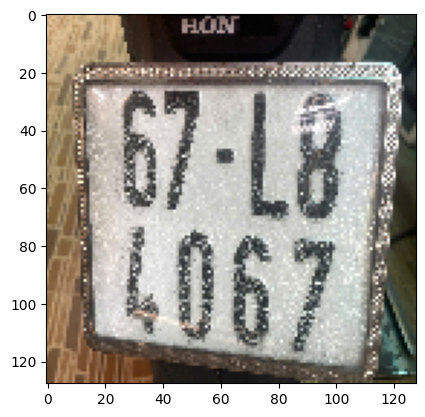

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Class: canhan-doanhnghieptunhan


In [4]:
from keras.utils import load_img
import numpy as np
path ='/content/z6431801200562_b6e8c463e3cc5fdccbbe6cdc6f5a6e0c.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

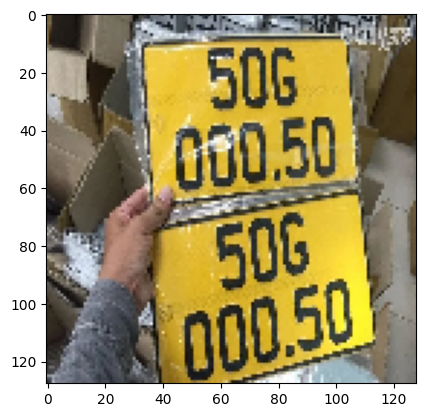

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Class: kinhdoanhvantai


In [5]:
from keras.utils import load_img
import numpy as np
path ='/content/bien-so-xe-05-326504j.webp'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

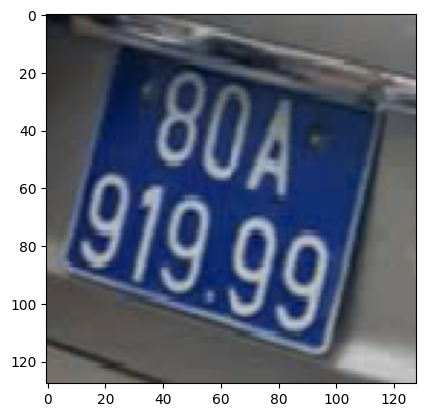

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Class: congan-canhsatdacbiet


In [6]:
from keras.utils import load_img
import numpy as np
path ='/content/1.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

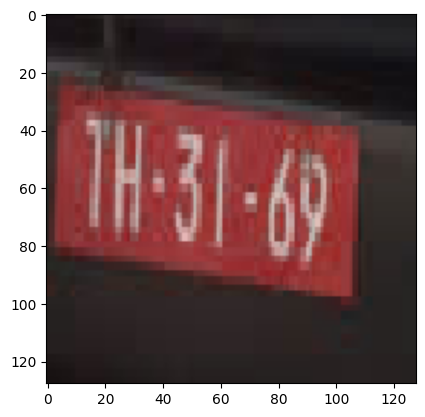

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Class: quandoi-quocphong


In [7]:
from keras.utils import load_img
import numpy as np
path ='/content/z6431817325097_43d1e048fb2fa6d687006c118ff58c44.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")